# The notebook based on the random-selected dataset2.

In [77]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('training set2.csv')

### Transform the event_time into type of (midnight, forenoon, afternoon and evening)

In [3]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,15,view,21401322,2053013561579406073,electronics.clocks,casio,27.46,526208970,67de9f91-e635-489d-a0d2-e1abc122c92c
1,06,view,12715359,2053013553559896355,NaN,comforser,50.19,514269583,82122393-292e-4043-8be0-4b773f758073
2,10,view,28722077,2053013565639492569,apparel.shoes,greyder,139.00,512856312,eb2ad4e3-a998-4e54-94a9-efb1e3d49a3b
3,05,view,1005115,2053013555631882655,electronics.smartphone,apple,916.37,549560534,588fe0f8-6e24-4384-9b7e-c4a97a555e90
4,15,view,12100513,2053013555816432043,kids.skates,maomaoku,334.63,518643991,d3e65c2f-d4cf-4417-ac4e-c028a1135d8e
...,...,...,...,...,...,...,...,...,...
9995,06,view,1004833,2053013555631882655,electronics.smartphone,samsung,168.78,518739883,a79aff92-9c6a-4847-a694-73998ad65e6e
9996,17,view,5300914,2053013563173241677,NaN,philips,64.33,557444079,0181a0ae-91e6-46f9-b95c-fa1f9002b46f
9997,07,view,1005133,2053013555631882655,electronics.smartphone,apple,1616.49,514523508,f7c4f8e1-2772-404f-aa05-3c338c4ea553
9998,12,view,1801699,2053013554415534427,electronics.video.tv,haier,180.16,520752071,b3ad395b-ed51-44ca-9d5b-781115a1c530


In [4]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [5]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,view,21401322,2053013561579406073,electronics.clocks,casio,27.46,526208970,67de9f91-e635-489d-a0d2-e1abc122c92c
1,forenoon,view,12715359,2053013553559896355,NaN,comforser,50.19,514269583,82122393-292e-4043-8be0-4b773f758073
2,forenoon,view,28722077,2053013565639492569,apparel.shoes,greyder,139.00,512856312,eb2ad4e3-a998-4e54-94a9-efb1e3d49a3b
3,midnight,view,1005115,2053013555631882655,electronics.smartphone,apple,916.37,549560534,588fe0f8-6e24-4384-9b7e-c4a97a555e90
4,afternoon,view,12100513,2053013555816432043,kids.skates,maomaoku,334.63,518643991,d3e65c2f-d4cf-4417-ac4e-c028a1135d8e


### Drop out the missing value.

In [6]:
train=train.dropna()

# Develop a (Xtrain，Ytrain) set.

In [7]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [8]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,21401322,2053013561579406073,electronics.clocks,casio,27.46,526208970,67de9f91-e635-489d-a0d2-e1abc122c92c
2,forenoon,28722077,2053013565639492569,apparel.shoes,greyder,139.00,512856312,eb2ad4e3-a998-4e54-94a9-efb1e3d49a3b
3,midnight,1005115,2053013555631882655,electronics.smartphone,apple,916.37,549560534,588fe0f8-6e24-4384-9b7e-c4a97a555e90
4,afternoon,12100513,2053013555816432043,kids.skates,maomaoku,334.63,518643991,d3e65c2f-d4cf-4417-ac4e-c028a1135d8e
5,evening,28717817,2053013565069067197,apparel.shoes.keds,nike,102.71,568454273,72709b2e-ff9b-4d9f-861d-560a7162f4ce
...,...,...,...,...,...,...,...,...
9991,afternoon,2900692,2053013554776244595,appliances.kitchen.microwave,panasonic,205.90,531616347,31bda769-62c6-4100-b835-82b88d340011
9994,afternoon,1004792,2053013555631882655,electronics.smartphone,xiaomi,476.18,560734289,5490251d-37f8-40f3-9299-59f74d6ac996
9995,forenoon,1004833,2053013555631882655,electronics.smartphone,samsung,168.78,518739883,a79aff92-9c6a-4847-a694-73998ad65e6e
9997,forenoon,1005133,2053013555631882655,electronics.smartphone,apple,1616.49,514523508,f7c4f8e1-2772-404f-aa05-3c338c4ea553


In [9]:
Y

0       view
2       view
3       view
4       view
5       view
        ... 
9991    view
9994    view
9995    view
9997    view
9998    view
Name: event_type, Length: 6238, dtype: object

### LabelEncoder

In [10]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [11]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,21401322,2053013561579406073,84,93,27.46,526208970,2561
2,2,28722077,2053013565639492569,10,197,139.00,512856312,5748
3,3,1005115,2053013555631882655,85,22,916.37,549560534,2214
4,0,12100513,2053013555816432043,103,298,334.63,518643991,5189
5,1,28717817,2053013565069067197,12,336,102.71,568454273,2813
...,...,...,...,...,...,...,...,...
9991,0,2900692,2053013554776244595,35,357,205.90,531616347,1287
9994,0,1004792,2053013555631882655,85,509,476.18,560734289,2123
9995,2,1004833,2053013555631882655,85,416,168.78,518739883,4094
9997,2,1005133,2053013555631882655,85,22,1616.49,514523508,6050


In [12]:
Y

0       view
2       view
3       view
4       view
5       view
        ... 
9991    view
9994    view
9995    view
9997    view
9998    view
Name: event_type, Length: 6238, dtype: object

In [13]:
df=pd.concat([X,Y],axis=1)
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,0,21401322,2053013561579406073,84,93,27.46,526208970,2561,view
2,2,28722077,2053013565639492569,10,197,139.00,512856312,5748,view
3,3,1005115,2053013555631882655,85,22,916.37,549560534,2214,view
4,0,12100513,2053013555816432043,103,298,334.63,518643991,5189,view
5,1,28717817,2053013565069067197,12,336,102.71,568454273,2813,view


In [14]:
product_tags = df.iloc[:, 8]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
df.iloc[:, 8] = label

In [15]:
df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,0,21401322,2053013561579406073,84,93,27.46,526208970,2561,2
2,2,28722077,2053013565639492569,10,197,139.00,512856312,5748,2
3,3,1005115,2053013555631882655,85,22,916.37,549560534,2214,2
4,0,12100513,2053013555816432043,103,298,334.63,518643991,5189,2
5,1,28717817,2053013565069067197,12,336,102.71,568454273,2813,2
...,...,...,...,...,...,...,...,...,...
9991,0,2900692,2053013554776244595,35,357,205.90,531616347,1287,2
9994,0,1004792,2053013555631882655,85,509,476.18,560734289,2123,2
9995,2,1004833,2053013555631882655,85,416,168.78,518739883,4094,2
9997,2,1005133,2053013555631882655,85,22,1616.49,514523508,6050,2


# Visualization and data analysis

In [16]:
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,view,21401322,2053013561579406073,electronics.clocks,casio,27.46,526208970,67de9f91-e635-489d-a0d2-e1abc122c92c
2,forenoon,view,28722077,2053013565639492569,apparel.shoes,greyder,139.00,512856312,eb2ad4e3-a998-4e54-94a9-efb1e3d49a3b
3,midnight,view,1005115,2053013555631882655,electronics.smartphone,apple,916.37,549560534,588fe0f8-6e24-4384-9b7e-c4a97a555e90
4,afternoon,view,12100513,2053013555816432043,kids.skates,maomaoku,334.63,518643991,d3e65c2f-d4cf-4417-ac4e-c028a1135d8e
5,evening,view,28717817,2053013565069067197,apparel.shoes.keds,nike,102.71,568454273,72709b2e-ff9b-4d9f-861d-560a7162f4ce
...,...,...,...,...,...,...,...,...,...
9991,afternoon,view,2900692,2053013554776244595,appliances.kitchen.microwave,panasonic,205.90,531616347,31bda769-62c6-4100-b835-82b88d340011
9994,afternoon,view,1004792,2053013555631882655,electronics.smartphone,xiaomi,476.18,560734289,5490251d-37f8-40f3-9299-59f74d6ac996
9995,forenoon,view,1004833,2053013555631882655,electronics.smartphone,samsung,168.78,518739883,a79aff92-9c6a-4847-a694-73998ad65e6e
9997,forenoon,view,1005133,2053013555631882655,electronics.smartphone,apple,1616.49,514523508,f7c4f8e1-2772-404f-aa05-3c338c4ea553


In [17]:
train.describe()

,product_id,category_id,price,user_id
count,6.238000e+03,6.238000e+03,6238.000000,6.238000e+03
mean,6.569461e+06,2.055991e+18,360.410840,5.364484e+08
std,1.220469e+07,1.678563e+16,385.306995,2.141326e+07
min,1.000978e+06,2.053014e+18,0.880000,3.536007e+08
25%,1.004950e+06,2.053014e+18,107.492500,5.163153e+08
50%,1.801768e+06,2.053014e+18,215.170000,5.326022e+08
75%,5.100863e+06,2.053014e+18,466.185000,5.561044e+08
max,1.000223e+08,2.173326e+18,2574.040000,5.798544e+08


In [18]:
train["event_time"].value_counts()

afternoon    2320
forenoon     2032
midnight     1098
evening       788
Name: event_time, dtype: int64

In [19]:
train["event_time"].value_counts()

afternoon    2320
forenoon     2032
midnight     1098
evening       788
Name: event_time, dtype: int64

In [20]:
train["brand"].value_counts()

samsung      1172
apple         916
xiaomi        654
huawei        195
oppo          133
             ... 
olmio           1
bluesonic       1
biostar         1
shagovita       1
usams           1
Name: brand, Length: 521, dtype: int64

In [21]:
train["price"].value_counts()

102.94    28
89.84     28
386.08    25
154.42    25
154.19    24
          ..
253.02     1
437.08     1
545.45     1
939.54     1
4.86       1
Name: price, Length: 3372, dtype: int64

NameError: name 'save_fig' is not defined

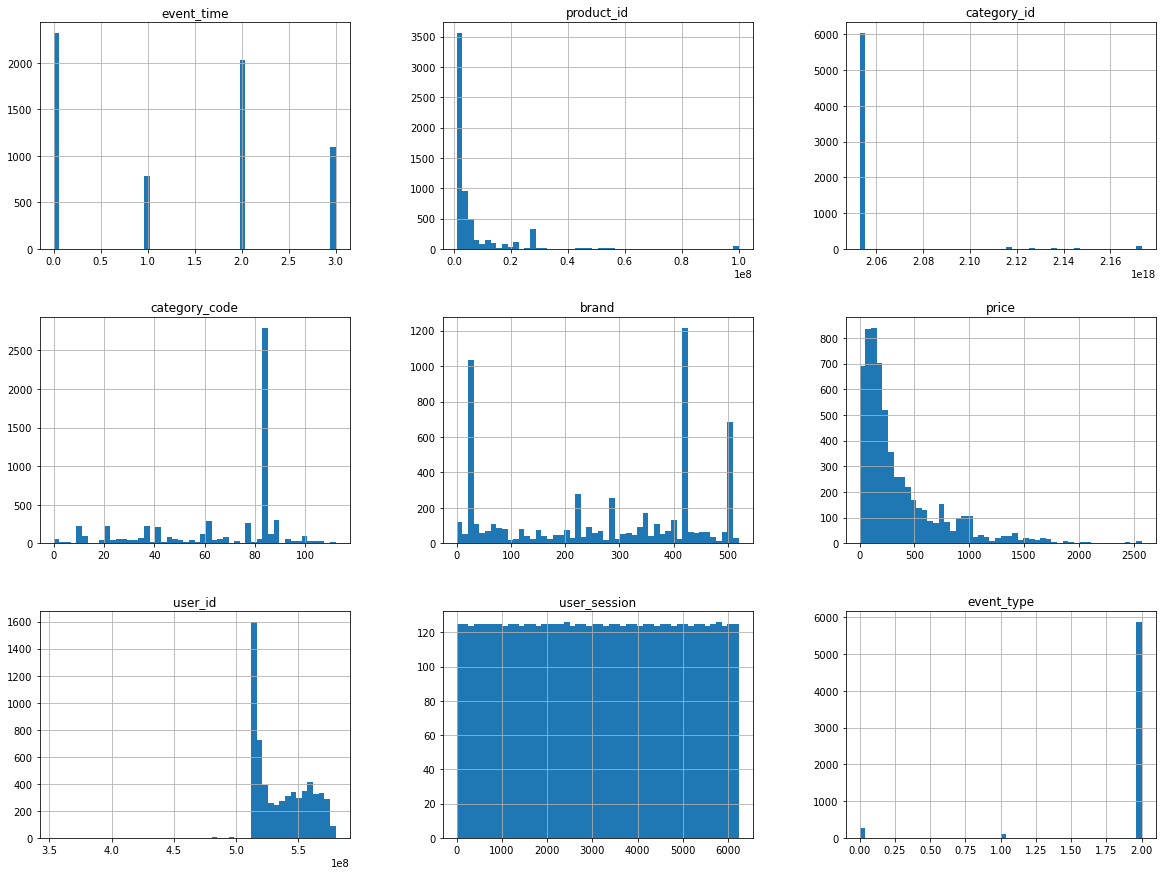

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.figure(dpi=300)
plt.show()

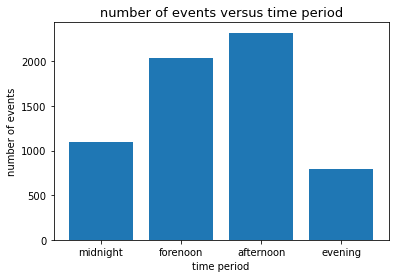

In [24]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.figure(dpi=300)
plt.show()


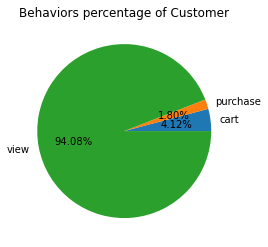

In [25]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.figure(dpi=500)
plt.subplots_adjust(0.3,0,1,1)
plt.show()

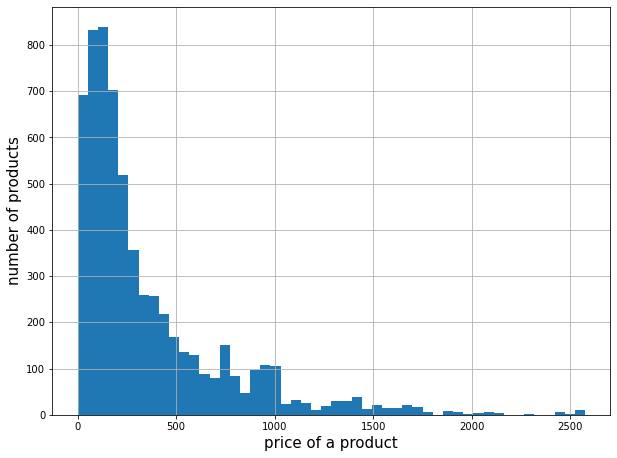

<Figure size 900x600 with 0 Axes>

In [26]:
af = train["price"]
import matplotlib.pyplot as plt
af.hist(bins=50, figsize=(10,7.5))
plt.xlabel('price of a product',fontsize=15)
plt.ylabel('number of products',fontsize=15)
plt.figure(dpi=150)
plt.show()

# Models operating

# 1.Linear regression

In [9]:
df1=train.drop(['product_id','category_id','category_code','user_id','user_session'],axis=1)

In [10]:
df1

,event_time,event_type,brand,price
0,afternoon,view,casio,27.46
2,forenoon,view,greyder,139.00
3,midnight,view,apple,916.37
4,afternoon,view,maomaoku,334.63
5,evening,view,nike,102.71
6,evening,view,elari,66.76
8,afternoon,view,xiaomi,330.91
9,afternoon,view,calvinklein,276.97
10,afternoon,view,kingston,65.35
11,midnight,view,apple,2028.34


In [11]:
product_tags = df1.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le = le.fit(product_tags)
label = le.transform(product_tags)
df1.iloc[:, 0] = label\

product_tags1 = df1.iloc[:, 1]
le = LabelEncoder() 
le = le.fit(product_tags1)
label = le.transform(product_tags1)
df1.iloc[:, 1] = label

product_tags2 = df1.iloc[:, 2]
le = LabelEncoder() 
le = le.fit(product_tags2)
label = le.transform(product_tags2)
df1.iloc[:, 2] = label

In [12]:
df1

,event_time,event_type,brand,price
0,0,2,93,27.46
2,2,2,197,139.00
3,3,2,22,916.37
4,0,2,298,334.63
5,1,2,336,102.71
6,1,2,151,66.76
8,0,2,509,330.91
9,0,2,84,276.97
10,0,2,266,65.35
11,3,2,22,2028.34


In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [14]:
test_set.head()

,event_time,event_type,brand,price
4607,2,2,74,36.41
4707,2,0,509,190.21
2491,1,2,368,120.98
9461,0,2,72,345.22
6152,1,0,22,545.14


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn import linear_model

In [16]:
results = smf.ols('event_time ~ event_type + price + brand', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9622
Date:                Sat, 02 Oct 2021   Prob (F-statistic):              0.410
Time:                        02:27:19   Log-Likelihood:                -9687.8
No. Observations:                6238   AIC:                         1.938e+04
Df Residuals:                    6234   BIC:                         1.941e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4233      0.075     19.078      0.0

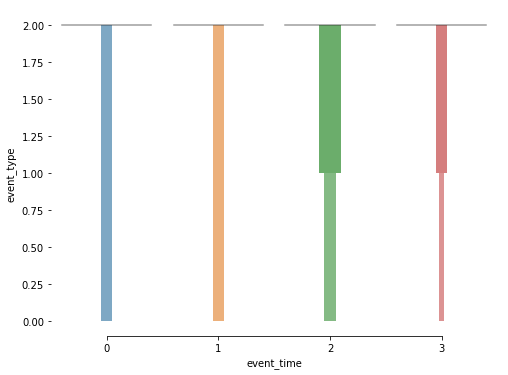

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.boxenplot(x='event_time',y='event_type',data=df1)
sns.despine(trim=True,left=True)

In [18]:
corr=df1.corr()
corr

,event_time,event_type,brand,price
event_time,1.000000,-0.017717,-0.002426,-0.010546
event_type,-0.017717,1.000000,0.002922,-0.007319
brand,-0.002426,0.002922,1.000000,-0.305065
price,-0.010546,-0.007319,-0.305065,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

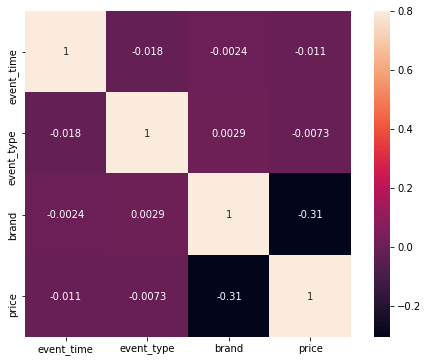

In [19]:
ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Linear regression(2)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [21]:
cols = list(df1)
cols.insert(1,cols.pop(cols.index('event_time'))) # 2是将d放在哪一列，cols.pop(cols.index('d')) 是要换的d列
df1 = df1.loc[:,cols] # 开始按照两列互换

## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的

X = df1.iloc[:,1:]
Y=df1['event_type']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(4990, 3)
(1248, 3)
(4990,)


In [22]:
# 查看训练集上的数据信息(X)
X_train.describe()

,event_time,brand,price
count,4990.000000,4990.000000,4990.000000
mean,1.306814,271.602605,362.623990
std,1.147323,175.966700,390.463256
min,0.000000,0.000000,0.880000
25%,0.000000,74.000000,107.500000
50%,2.000000,308.000000,216.390000
75%,2.000000,416.000000,475.812500
max,3.000000,520.000000,2574.040000


In [23]:
from sklearn.preprocessing import StandardScaler
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集(有一个数据的映射)
# scikit-learn中：如果一个API名字有fit，那么就有模型训练的含义，没法返回值
# scikit-learn中：如果一个API名字中有transform， 那么就表示对数据具有转换的含义操作
# scikit-learn中：如果一个API名字中有predict，那么就表示进行数据预测，会有一个预测结果输出
# scikit-learn中：如果一个API名字中既有fit又有transform的情况下，那就是两者的结合(先做fit，再做transform)
ss = StandardScaler() # 模型对象创建
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

pd.DataFrame(X_train).describe()


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
count,4.990000e+03,4.990000e+03,4.990000e+03
mean,-6.874928e-17,3.944740e-17,3.312870e-17
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.139125e+00,-1.543643e+00,-9.265411e-01
25%,-1.139125e+00,-1.123067e+00,-6.534534e-01
50%,6.042378e-01,2.068632e-01,-3.745516e-01
75%,6.042378e-01,8.206772e-01,2.899117e-01
max,1.475919e+00,1.411757e+00,5.664138e+00


In [24]:
## 模型训练
import numpy as np
lr = LinearRegression(fit_intercept=True) # 模型对象构建
'''
LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)
	fit_intercept：是否需要截距
	normalize：是否做标准化，上面已在单拿出来做了标准化
	copy_X：是否进行数据复制，如果复制了，对数据进行修改，就不会改变原数据
	n_jobs：并行运行。但需要CPU至少双核，基本不怎么用
'''
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("training R2:",lr.score(X_train, Y_train))
print("test R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
# 输出模型训练得到的相关参数
print("model coefficient(θ):", end="")
print(lr.coef_)
print("model intercept:", end='')
print(lr.intercept_)


training R2: 0.00045426128601810944
test R2: -0.0013102159329236862
rmse: 0.3965046127316506
model coefficient(θ):[-0.00747515 -0.0016505  -0.00530948]
model intercept:1.8969939879759519


### Model testing (require sklearn version =0.24)  

In [25]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "df1_ss.model") ## 将标准化模型保存
joblib.dump(lr, "df1_lr.model") ## 将模型保存

['df1_lr.model']

In [26]:
#load model
ss3 = joblib.load("df1_ss.model") 
lr3 = joblib.load("df1_lr.model") 

# predict
df1 = [[3, 398, 127.91]]
df1 = ss.transform(df1)
print(df1)
lr.predict(df1)

[[ 1.47591945  0.71837491 -0.60117696]]


array([1.88796753])

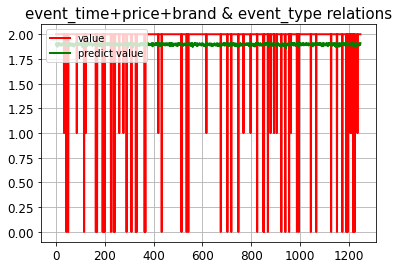

In [121]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("event_time+price+brand & event_type relations", fontsize=15)
plt.grid(b=True)#加网格
plt.show()

# Linear Regression(3)

In [122]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
results = smf.ols(formula='event_time ~ event_type + price', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.334
Date:                Sat, 02 Oct 2021   Prob (F-statistic):              0.263
Time:                        00:16:07   Log-Likelihood:                -9687.9
No. Observations:                6238   AIC:                         1.938e+04
Df Residuals:                    6235   BIC:                         1.940e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4103      0.069     20.379      0.0

# 2.Random forest

In [123]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [124]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.8867521367521367 Random Forest:0.9161324786324786


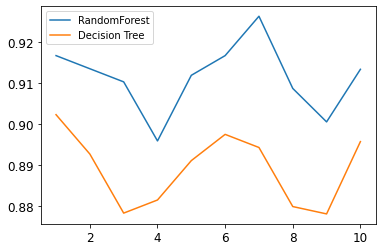

In [125]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

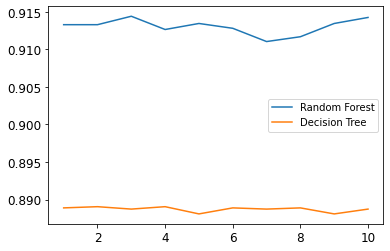

In [126]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,Y,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 3.KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
knn = KNeighborsClassifier()    #实例化KNN模型
knn.fit(X_train, Y_train)      #放入训练数据进行训练
score_k = knn.score(Xtest,Ytest)
print(score_k)

0.9476495726495726


# 4.ADA Boost

In [129]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
ada = AdaBoostClassifier()    #实例化KNN模型
ada.fit(X_train, Y_train)       #放入训练数据进行训练
score_k = ada.score(Xtest,Ytest)
print(score_k)

0.9401709401709402


# 5.Netural network

In [131]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data
pipe.score(X_test, Y_test)

0.96

In [132]:
from sklearn.neural_network import MLPClassifier


rdm = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(6228,1500,1000,), random_state=1)
rdm.fit(X_train, Y_train)
rdm.score(X_test,Y_test)

0.92